In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression # doğrusal regresyon modelleri oluşturmak için kullanılır.
from sklearn.preprocessing import PolynomialFeatures # polinomik özellikler oluşturmak için kullanılır.

# Polinomsal Regresyon

Polinomsal Regresyon Nedir?

* Tanım: Degiskenler arasindeki iliskiyi dogrusal olmadıgı durumlarda basvurulan analiz metodudur.

*   Dogrusal Regresyon  =   (y = b0 + b1x1)
    Çoklu Dogrusal Regresyon = (y = b0 + b1x1 + b2x2 + ... + bnxn)
    Polinomsal Regresyon  = (y = b0 + b1x1 + b2x1 üssü 2 + b üssü 1 x 1 üssü n)

In [2]:
df = pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [3]:
# sklearn input olarak genelde numpy kabul eder.
y = df.araba_max_hiz.values.reshape(-1,1) #numpy array'e çevir
x = df.araba_fiyat.values.reshape(-1,1) # numpy array'e çevir

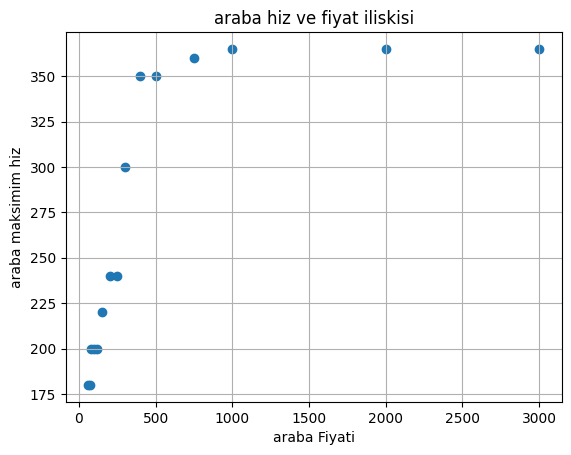

In [4]:
# veriyi görselleştirme
plt.scatter(x,y)
plt.ylabel("araba maksimim hiz")
plt.xlabel("araba Fiyati")
plt.title("araba hiz ve fiyat iliskisi")
plt.grid(True)
plt.show()

In [5]:
# Dogrusal regresyon modeli egitimi
lr = LinearRegression()
# dogrusal regresyon egitimi
lr.fit(x,y) 

LinearRegression()

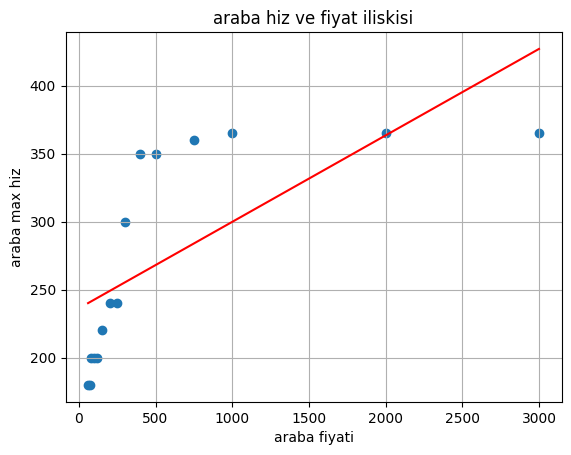

10 bin Tl'lik araba hizi tahmini:  [[871.66401826]]


In [6]:
# tahmin

y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color = "red")
plt.ylabel("araba max hiz")
plt.xlabel("araba fiyati")
plt.title("araba hiz ve fiyat iliskisi")
plt.grid(True)
plt.show()

araba_fiyati = 10000
print("10 bin Tl'lik araba hizi tahmini: ",lr.predict((np.array([araba_fiyati]).reshape(1,-1))))

In [25]:
#polinomsal özellikler 
polinom_regresyon = PolynomialFeatures(degree=4) #4. dereceden polinom
x_polinom = polinom_regresyon.fit_transform(x) # fit_transform = verileri polinomik özelliklere donusturur hem de modeli bu yeni verilere gore egitir.
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [26]:
lr2 = LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

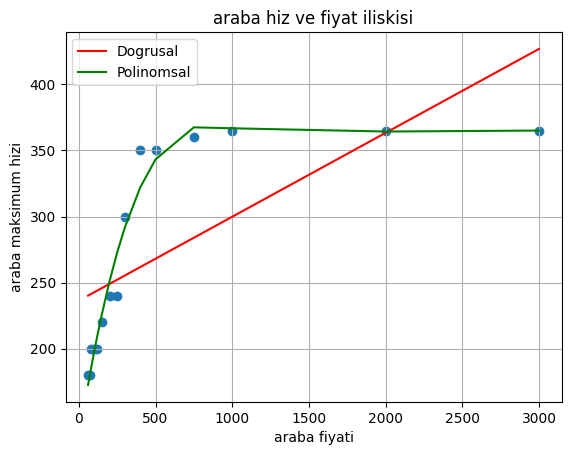

In [27]:
#tahmin 
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red", label= "Dogrusal")
plt.plot(x,y_tahmin2,color = "green", label="Polinomsal")
plt.legend()
plt.ylabel("araba maksimum hizi")
plt.xlabel("araba fiyati")
plt.title("araba hiz ve fiyat iliskisi")
plt.grid(True)
plt.show()